# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
from scipy.interpolate import splrep, splev
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

def PolyCoefficients2(x, x0, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


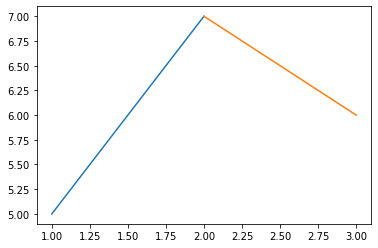

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


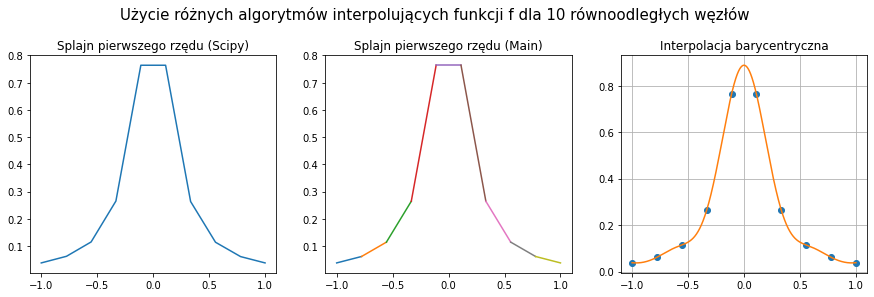

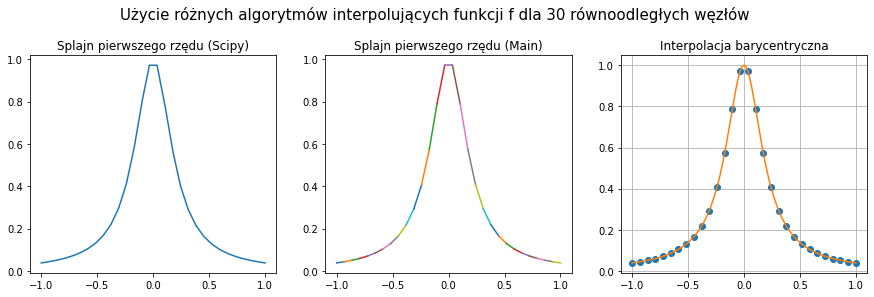

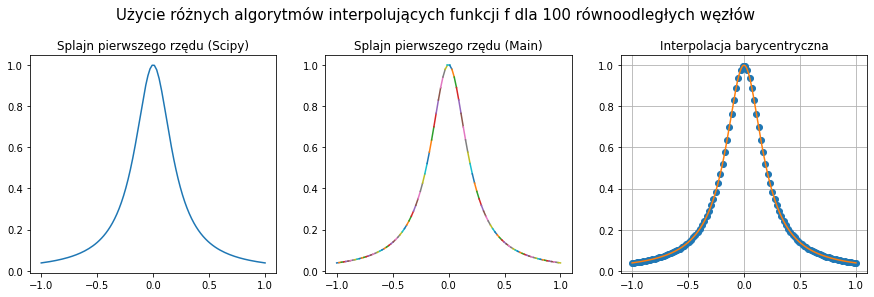

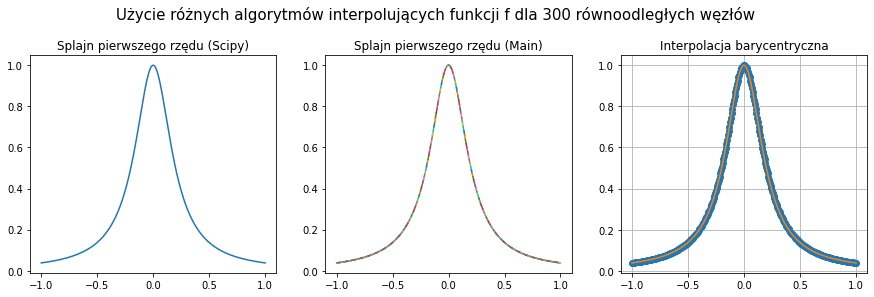

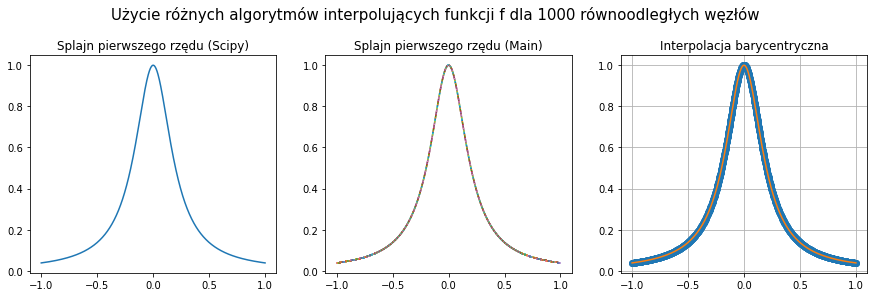

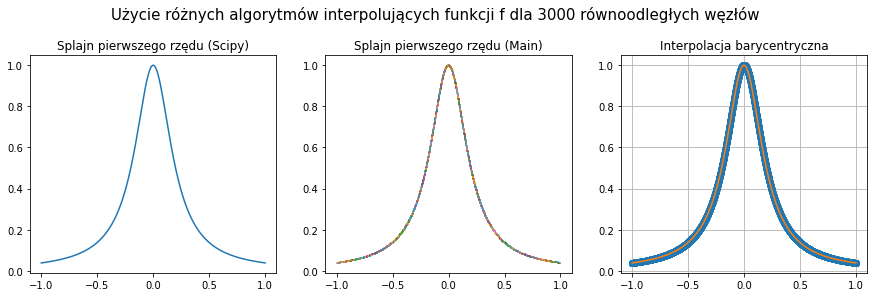

In [3]:
f = lambda x: 1/(25*x**2+1)
x = np.linspace(-1,1,10000)
y = f(x)
knots_number_list = [10,30,100,300,1000,3000]
barycentric_error = []
first_spline_error = []

for knots_number in knots_number_list:
    
    xi = np.linspace(-1,1,knots_number)
    yi = f(xi)

    fig, ax = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle('Użycie różnych algorytmów interpolujących funkcji f dla {0} równoodległych węzłów'.format(knots_number),
                 fontsize = 15,y = 1.05)

    tck = splrep(xi,yi,k = 1)
    y_new = splev(x, tck)
    first_spline_error.append(main.L_inf(y,y_new))
    ax[0].plot(x,y_new)
    ax[0].set_title('Splajn pierwszego rzędu (Scipy)')

    a,b = main.first_spline(xi,yi)
    ab = [[b[i],a[i]] for i in range(len(a))]
    for i in range(len(xi)-1):
        x_new = np.linspace(xi[i], xi[i+1],1000)
        y_new = PolyCoefficients(x_new, ab[i])
        ax[1].plot(x_new, y_new)
    ax[1].set_title('Splajn pierwszego rzędu (Main)')

    wi = main.bar_czeb_weights(knots_number-1)
    y_new = main.barycentric_inte(xi, yi, wi, x)
    barycentric_error.append(main.L_inf(y,y_new))
    ax[2].plot(xi, yi, 'o')
    ax[2].plot(x, y_new)
    ax[2].grid()
    ax[2].set_title('Interpolacja barycentryczna')
    plt.show()

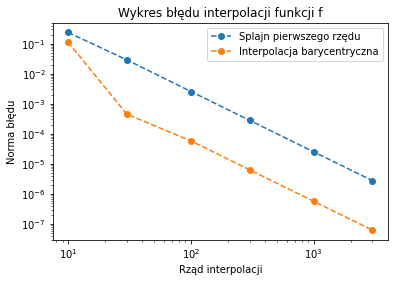

In [4]:
plt.loglog(knots_number_list,first_spline_error,'o--',label = 'Splajn pierwszego rzędu')
plt.loglog(knots_number_list,barycentric_error,'o--',label = 'Interpolacja barycentryczna')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres błędu interpolacji funkcji f')
plt.legend()
plt.show()

Z powyższego wykresu wyraźnie widać, że splajn pierwszego rzędu daje gorsze przybliżenie funkcji  $ f(x) = \frac{1}{25x^2+1}$ niż interpolacja barycentryczna tego samego rzędu. Różnica między błędem zmniejsza się jednak wraz z wzrostem przybliżenia.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


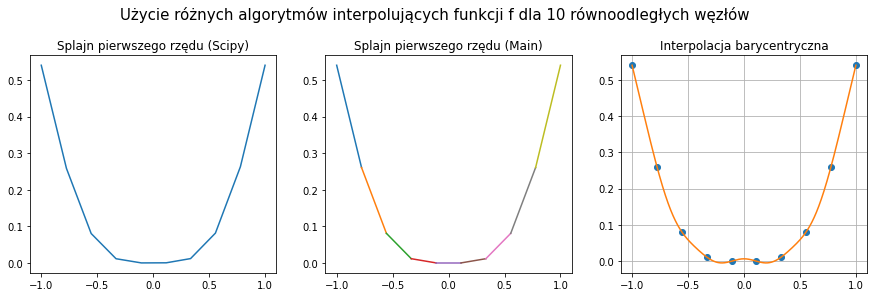

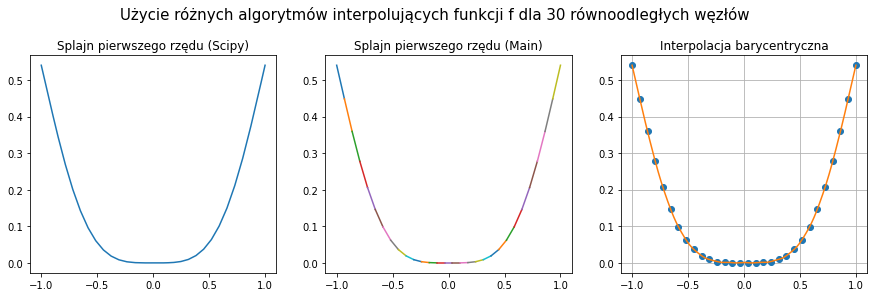

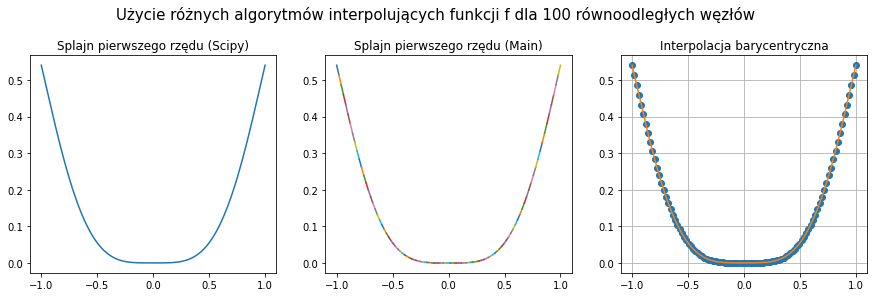

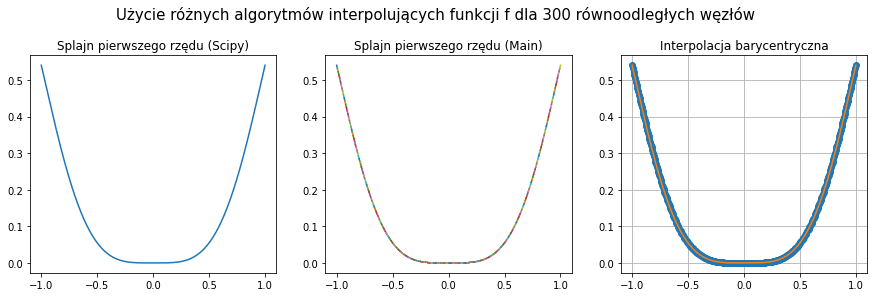

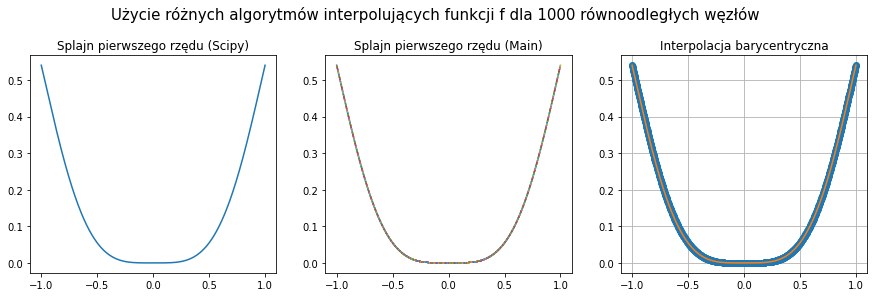

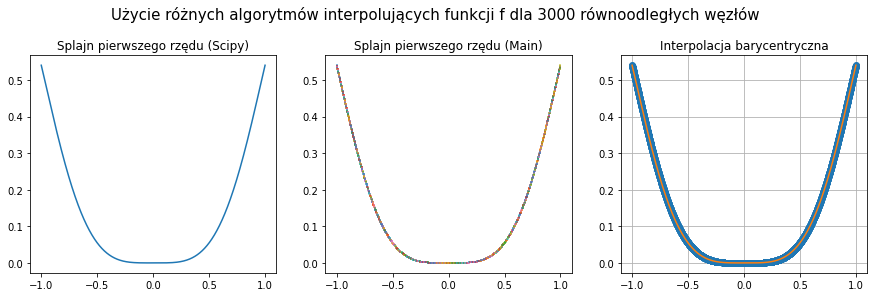

In [5]:
f = lambda x: np.cos(x)*(x**4)
x = np.linspace(-1,1,10000)
y = f(x)
knots_number_list = [10,30,100,300,1000,3000]
barycentric_error = []
first_spline_error = []

for knots_number in knots_number_list:
    
    xi = np.linspace(-1,1,knots_number)
    yi = f(xi)

    fig, ax = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle('Użycie różnych algorytmów interpolujących funkcji f dla {0} równoodległych węzłów'.format(knots_number),
                 fontsize = 15,y = 1.05)

    tck = splrep(xi,yi,k = 1)
    y_new = splev(x, tck)
    first_spline_error.append(main.L_inf(y,y_new))
    ax[0].plot(x,y_new)
    ax[0].set_title('Splajn pierwszego rzędu (Scipy)')

    a,b = main.first_spline(xi,yi)
    ab = [[b[i],a[i]] for i in range(len(a))]
    for i in range(len(xi)-1):
        x_new = np.linspace(xi[i], xi[i+1],1000)
        y_new = PolyCoefficients(x_new, ab[i])
        ax[1].plot(x_new, y_new)
    ax[1].set_title('Splajn pierwszego rzędu (Main)')

    wi = main.bar_czeb_weights(knots_number-1)
    y_new = main.barycentric_inte(xi, yi, wi, x)
    barycentric_error.append(main.L_inf(y,y_new))
    ax[2].plot(xi, yi, 'o')
    ax[2].plot(x, y_new)
    ax[2].grid()
    ax[2].set_title('Interpolacja barycentryczna')
    plt.show()

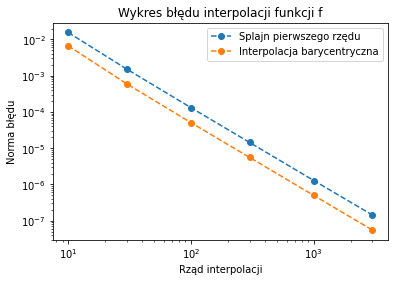

In [6]:
plt.loglog(knots_number_list,first_spline_error,'o--',label = 'Splajn pierwszego rzędu')
plt.loglog(knots_number_list,barycentric_error,'o--',label = 'Interpolacja barycentryczna')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres błędu interpolacji funkcji f')
plt.legend()
plt.show()

Z powyższego wykresu wyraźnie widać, że splajn pierwszego rzędu daje gorsze przybliżenie funkcji  $ f(x) = cos(x)x^4$ niż interpolacja barycentryczna tego samego rzędu. Różnica między błędem zmniejsza się wraz z wzrostem przybliżenia. Co ciekawe obydwa algorytmy dają mniejszy błąd niż użycie ich na funkcji z poprzedniego zadania oraz różnica pomiędzy nimi jest również mniejsza w stosunku do poprzedniego zadania.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



Ponieważ zaimplementowana funkcja *cubic_spline* daje co do wartości identyczne wyniki jak funkcja z pakietu Scipy, z względu na wygodę jako wzorca do funkcji przybliżanej splajnem kubicznym będę używać funkcji interpolowanej algorytmem z wymienionej biblioteki.

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


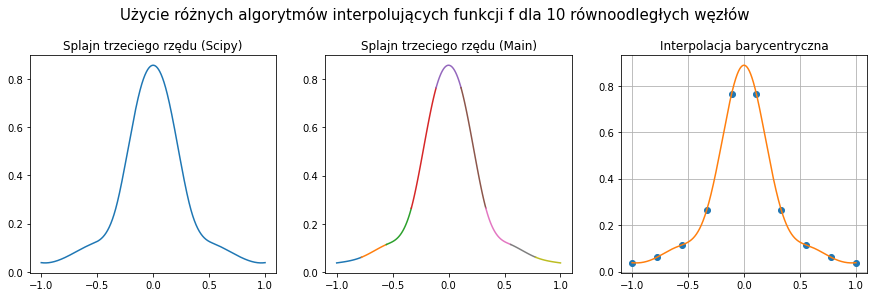

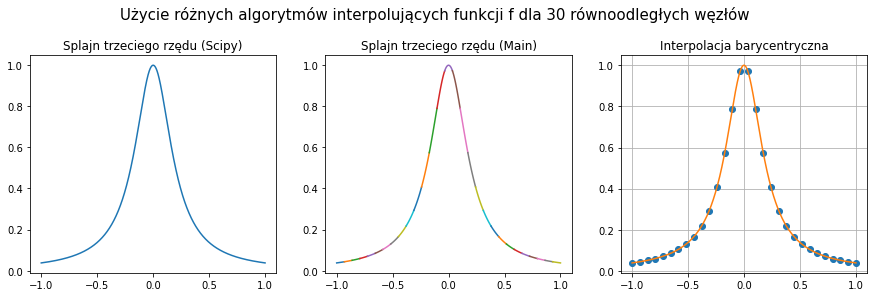

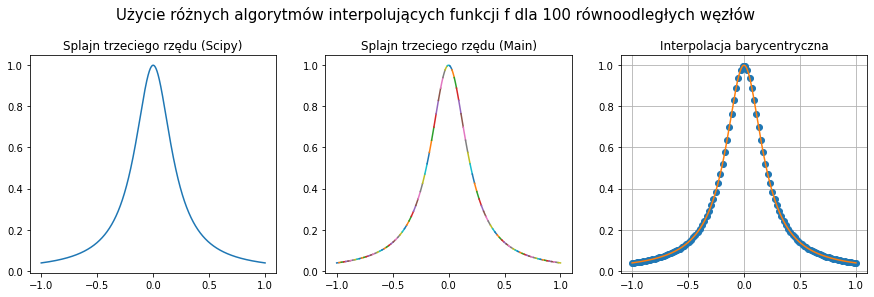

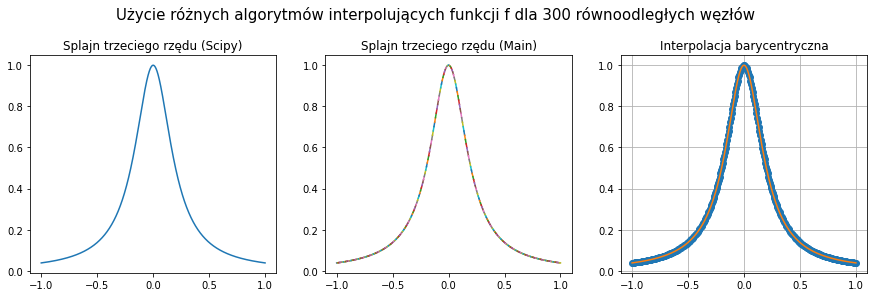

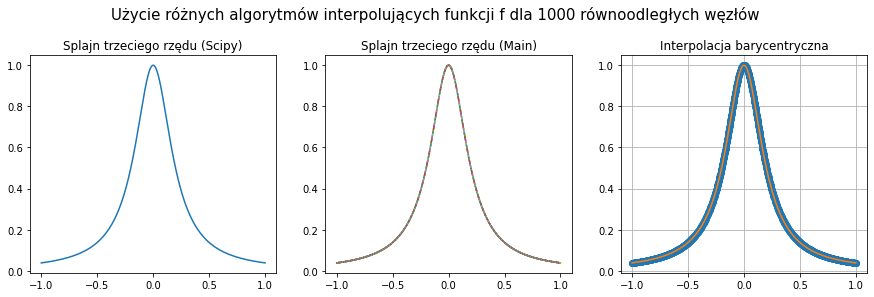

In [7]:
f = lambda x: 1/(25*x**2+1)
x = np.linspace(-1,1,10000)
y = f(x)
knots_number_list = [10,30,100,300,1000]
barycentric_error = []
cubic_spline_error = []

for knots_number in knots_number_list:
    
    xi = np.linspace(-1,1,knots_number)
    yi = f(xi)

    fig, ax = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle('Użycie różnych algorytmów interpolujących funkcji f dla {0} równoodległych węzłów'.format(knots_number),
                 fontsize = 15,y = 1.05)

    tck = splrep(xi,yi,k = 3)
    y_new = splev(x, tck)
    cubic_spline_error.append(main.L_inf(y,y_new))
    ax[0].plot(x,y_new)
    ax[0].set_title('Splajn trzeciego rzędu (Scipy)')

    b,c,d = main.cubic_spline(xi,yi)
    f_i = [[yi[i],b[i],c[i],d[i]] for i in range(len(b))]
    for i in range(len(xi)-1):
        x_new = np.linspace(xi[i], xi[i+1],100)
        ax[1].plot(x_new, PolyCoefficients2(x_new, xi[i], f_i[i]))
    ax[1].set_title("Splajn trzeciego rzędu (Main)")

    wi = main.bar_czeb_weights(knots_number-1)
    y_new = main.barycentric_inte(xi, yi, wi, x)
    barycentric_error.append(main.L_inf(y,y_new))
    ax[2].plot(xi, yi, 'o')
    ax[2].plot(x, y_new)
    ax[2].grid()
    ax[2].set_title('Interpolacja barycentryczna')
    plt.show()

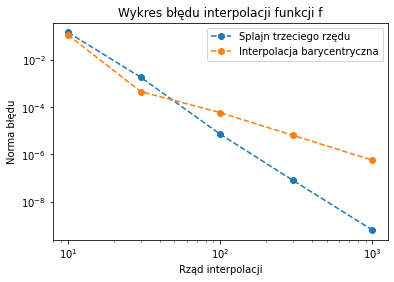

In [8]:
plt.loglog(knots_number_list,cubic_spline_error,'o--',label = 'Splajn trzeciego rzędu')
plt.loglog(knots_number_list,barycentric_error,'o--',label = 'Interpolacja barycentryczna')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres błędu interpolacji funkcji f')
plt.legend()
plt.show()

Na podstawie powyższego wykresu można stwierdzić, że dla niższych rzędów interpolacji interpolacja barycentryczna funkcji $ f(x) = \frac{1}{25x^2+1}$ radzi sobie lepiej od interpolacji splajnem trzeciego rzędu, jednak dla wyższych rzędów trend ten się odwraca i to splajn trzeciego rzędu daje lepsze rezultaty.

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


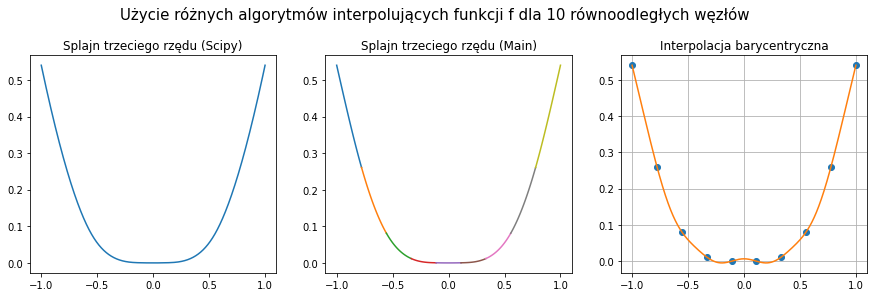

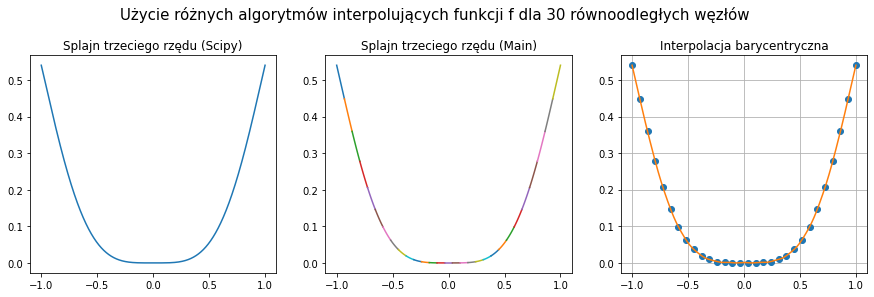

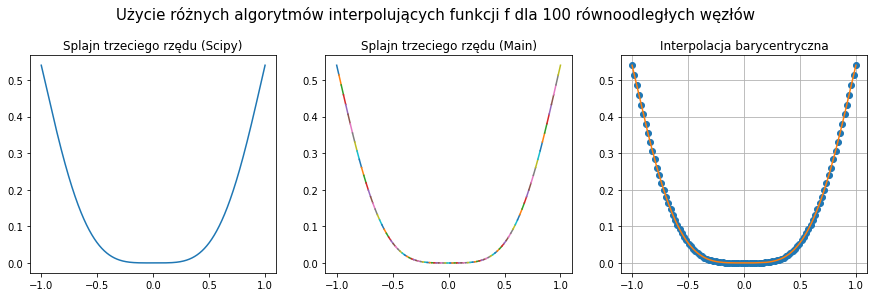

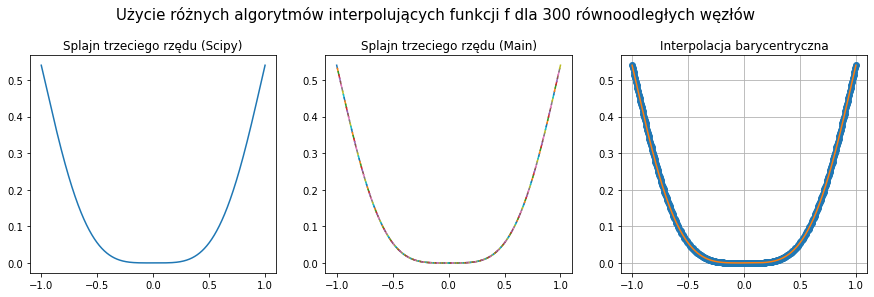

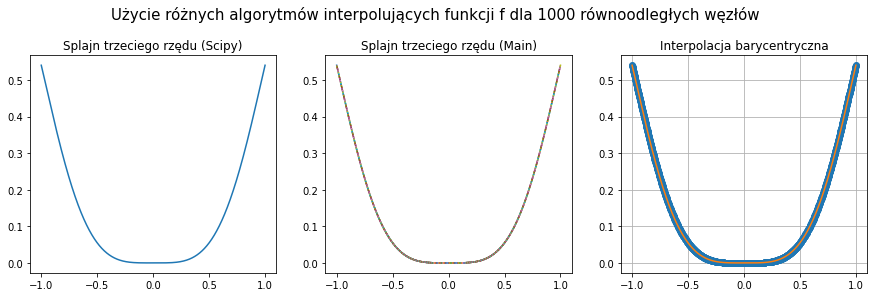

In [9]:
f = lambda x: np.cos(x)*(x**4)
x = np.linspace(-1,1,10000)
y = f(x)
knots_number_list = [10,30,100,300,1000]
barycentric_error = []
cubic_spline_error = []

for knots_number in knots_number_list:
    
    xi = np.linspace(-1,1,knots_number)
    yi = f(xi)

    fig, ax = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle('Użycie różnych algorytmów interpolujących funkcji f dla {0} równoodległych węzłów'.format(knots_number),
                 fontsize = 15,y = 1.05)

    tck = splrep(xi,yi,k = 3)
    y_new = splev(x, tck)
    cubic_spline_error.append(main.L_inf(y,y_new))
    ax[0].plot(x,y_new)
    ax[0].set_title('Splajn trzeciego rzędu (Scipy)')

    b,c,d = main.cubic_spline(xi,yi)
    f_i = [[yi[i],b[i],c[i],d[i]] for i in range(len(b))]
    for i in range(len(xi)-1):
        x_new = np.linspace(xi[i], xi[i+1],100)
        ax[1].plot(x_new, PolyCoefficients2(x_new, xi[i], f_i[i]))
    ax[1].set_title("Splajn trzeciego rzędu (Main)")

    wi = main.bar_czeb_weights(knots_number-1)
    y_new = main.barycentric_inte(xi, yi, wi, x)
    barycentric_error.append(main.L_inf(y,y_new))
    ax[2].plot(xi, yi, 'o')
    ax[2].plot(x, y_new)
    ax[2].grid()
    ax[2].set_title('Interpolacja barycentryczna')
    plt.show()

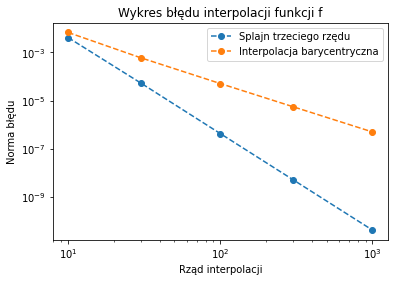

In [10]:
plt.loglog(knots_number_list,cubic_spline_error,'o--',label = 'Splajn trzeciego rzędu')
plt.loglog(knots_number_list,barycentric_error,'o--',label = 'Interpolacja barycentryczna')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres błędu interpolacji funkcji f')
plt.legend()
plt.show()

Na podstawie powyższego wykresu można stwierdzić, że splajn trzeciego rzędu lepiej przybliża funkcję $ f(x) = cos(x)x^4$ niezależnie od rzędu interpolacji.

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

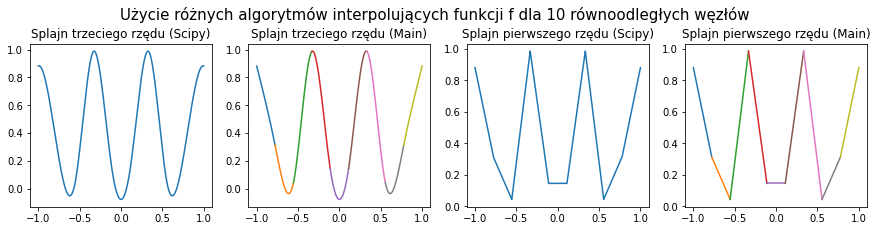

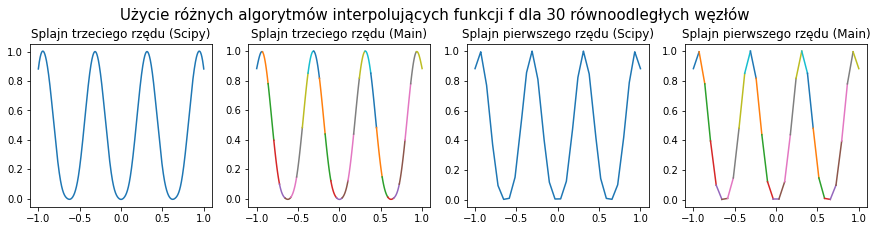

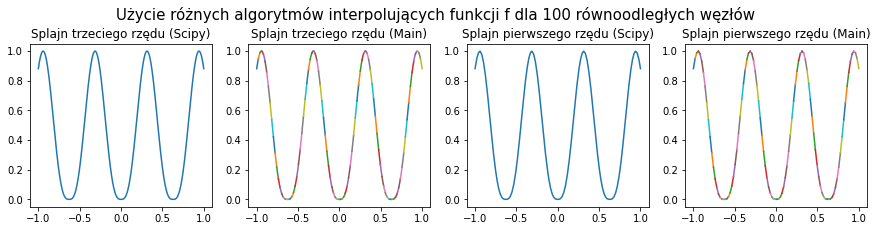

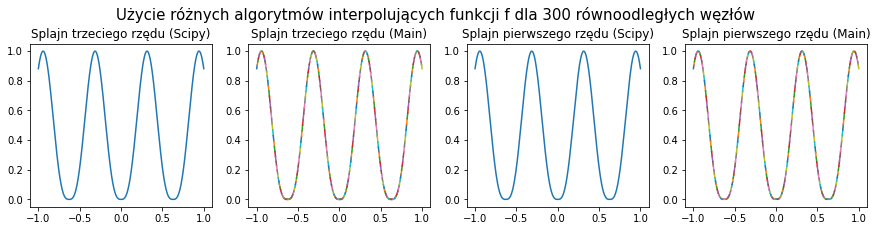

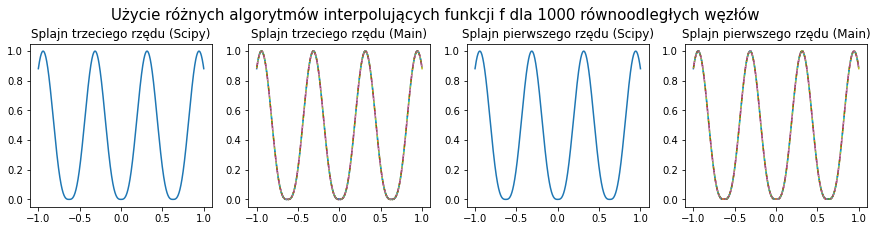

In [11]:
f = lambda x: (np.abs(np.sin(5*x)))**3
x = np.linspace(-1,1,10000)
y = f(x)
knots_number_list = [10,30,100,300,1000]
first_spline_error = []
cubic_spline_error = []

for knots_number in knots_number_list:
    
    xi = np.linspace(-1,1,knots_number)
    yi = f(xi)

    fig, ax = plt.subplots(1,4,figsize=(15,3))
    fig.suptitle('Użycie różnych algorytmów interpolujących funkcji f dla {0} równoodległych węzłów'.format(knots_number),
                 fontsize = 15,y = 1.05)

    tck = splrep(xi,yi,k = 3)
    y_new = splev(x, tck)
    cubic_spline_error.append(main.L_inf(y,y_new))
    ax[0].plot(x,y_new)
    ax[0].set_title('Splajn trzeciego rzędu (Scipy)')

    b,c,d = main.cubic_spline(xi,yi)
    f_i = [[yi[i],b[i],c[i],d[i]] for i in range(len(b))]
    for i in range(len(xi)-1):
        x_new = np.linspace(xi[i], xi[i+1],100)
        ax[1].plot(x_new, PolyCoefficients2(x_new, xi[i], f_i[i]))
    ax[1].set_title("Splajn trzeciego rzędu (Main)")
    
    tck = splrep(xi,yi,k = 1)
    y_new = splev(x, tck)
    first_spline_error.append(main.L_inf(y,y_new))
    ax[2].plot(x,y_new)
    ax[2].set_title('Splajn pierwszego rzędu (Scipy)')
    
    a,b = main.first_spline(xi,yi)
    ab = [[b[i],a[i]] for i in range(len(a))]
    for i in range(len(xi)-1):
        x_new = np.linspace(xi[i], xi[i+1],1000)
        y_new = PolyCoefficients(x_new, ab[i])
        ax[3].plot(x_new, y_new)
    ax[3].set_title('Splajn pierwszego rzędu (Main)')
    plt.show()
    

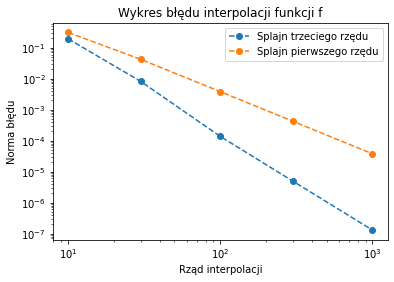

In [12]:
plt.loglog(knots_number_list,cubic_spline_error,'o--',label = 'Splajn trzeciego rzędu')
plt.loglog(knots_number_list,first_spline_error,'o--',label = 'Splajn pierwszego rzędu')
plt.xlabel('Rząd interpolacji')
plt.ylabel('Norma błędu')
plt.title('Wykres błędu interpolacji funkcji f')
plt.legend()
plt.show()

Na powyższym wykresie wyraźnie widać, że zgodnie z oczekiwaniami splajn trzeciego rzędu dużo lepiej przybliża funkcję $f(x) = |sin(5x)|^3$ niż splajn pierwszego rzędu. Różnica ta zwiększa się wraz z wzrostem rzędu interpolacji.